Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzipping dataset

In [5]:
!unzip /content/drive/MyDrive/face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

Importing required libraries

In [6]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

Path for training and test data

In [7]:
train_dir = "/content/images/train"
validation_dir = "/content/images/validation"

In [8]:
Data_Dir="/content/images/train//"

In [9]:
a_images = os.listdir(Data_Dir+"angry")
d_images = os.listdir(Data_Dir+"disgust")
f_images = os.listdir(Data_Dir+"fear")
h_images = os.listdir(Data_Dir+"happy")
n_images = os.listdir(Data_Dir+"neutral")
sad_images = os.listdir(Data_Dir+"sad")
sur_images = os.listdir(Data_Dir+"surprise")

   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise


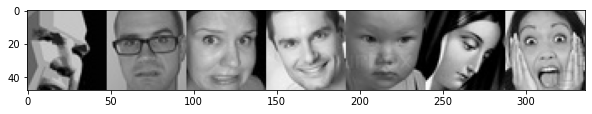

   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise


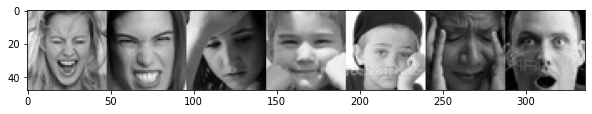

   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise


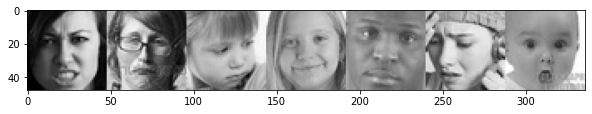

   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise


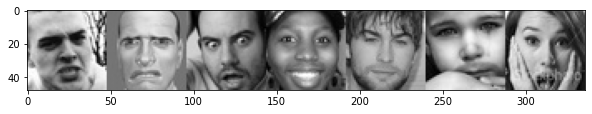

   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise


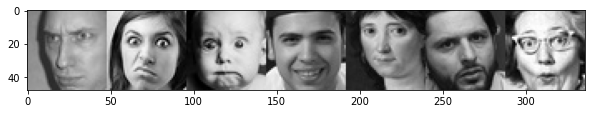

In [10]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    angry = cv2.imread(Data_Dir+"angry//"+a_images[i])
    angry = skimage.transform.resize(angry, (48, 48))

    disgust = cv2.imread(Data_Dir+"disgust//"+d_images[i])
    disgust = skimage.transform.resize(disgust, (48, 48))

    fear = cv2.imread(Data_Dir+"fear//"+f_images[i])
    fear = skimage.transform.resize(fear, (48, 48))

    happy = cv2.imread(Data_Dir+"happy//"+h_images[i])
    happy = skimage.transform.resize(happy, (48,48))

    neutral = cv2.imread(Data_Dir+"neutral//"+n_images[i])
    neutral = skimage.transform.resize(neutral, (48,48))

    sad = cv2.imread(Data_Dir+"sad//"+sad_images[i])
    sad = skimage.transform.resize(sad, (48, 48))

    sur = cv2.imread(Data_Dir+"surprise//"+sur_images[i])
    sur = skimage.transform.resize(sur, (48, 48) , mode = 'reflect')

    pair = np.concatenate((angry, disgust,fear,happy,neutral,sad,sur), axis=1)
    print("   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

image preprocessing


In [11]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
					train_dir,
					color_mode='grayscale',
					target_size=(48,48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

Found 28821 images belonging to 7 classes.


In [13]:
validation_generator = val_datagen.flow_from_directory(
							validation_dir,
							color_mode='grayscale',
							target_size=(48,48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 7066 images belonging to 7 classes.


In [70]:
classes=train_generator.class_indices

In [75]:
all_class=list(classes.keys())
all_class

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [15]:
validation_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [16]:
train_generator.image_shape

(48, 48, 1)

In [17]:
type(train_generator[0][0])

numpy.ndarray

In [18]:
train_generator[0][0]

array([[[[0.15005577],
         [0.3558625 ],
         [0.5486403 ],
         ...,
         [0.02137114],
         [0.01967228],
         [0.01452019]],

        [[0.09295543],
         [0.2547542 ],
         [0.4936516 ],
         ...,
         [0.0129379 ],
         [0.01980736],
         [0.02667682]],

        [[0.05925265],
         [0.18642232],
         [0.41188666],
         ...,
         [0.03661525],
         [0.05207154],
         [0.06008803]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.21471769],
         [0.22352943],
         [0.22352943]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.20230088],
         [0.22092298],
         [0.22352943]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.18988405],
         [0.2173753 ],
         [0.22352943]]],


       [[[0.9964909 ],
         [0.9962135 ],
         [0.99

Initializing model

In [19]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(7,kernel_initializer='he_normal'))#Number of class=7
model.add(Activation('softmax'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [22]:
%%time
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=900,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=220
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
900/900 [==============================] - 60s 29ms/step - loss: 2.4656 - accuracy: 0.1722 - val_loss: 1.7776 - val_accuracy: 0.2638
Epoch 2/30
900/900 [==============================] - 25s 28ms/step - loss: 1.8351 - accuracy: 0.2267 - val_loss: 1.7662 - val_accuracy: 0.2695
Epoch 3/30
900/900 [==============================] - 25s 28ms/step - loss: 1.7949 - accuracy: 0.2448 - val_loss: 1.7952 - val_accuracy: 0.2469
Epoch 4/30
900/900 [==============================] - 25s 28ms/step - loss: 1.7807 - accuracy: 0.2642 - val_loss: 1.6551 - val_accuracy: 0.3237
Epoch 5/30
900/900 [==============================] - 25s 28ms/step - loss: 1.7269 - accuracy: 0.2896 - val_loss: 1.5925 - val_accuracy: 0.3798
Epoch 6/30
900/900 [==============================] - 26s 28ms/step - loss: 1.6472 - accuracy: 0.3400 - val_loss: 1.4743 - val_accuracy: 0.4280
Epoch 7/30
900/900 [==============================] - 26s 28ms/step - loss: 1.5685 - accuracy: 0.3829 - val_loss: 1.3053 - val_accuracy:

In [23]:
model.save("my_model",save_format='h5')

In [24]:
model.evaluate(validation_generator)

221/221 [==============================] - 2s 11ms/step - loss: 0.9991 - accuracy: 0.6278


[0.9990886449813843, 0.6277951002120972]

Testing

In [26]:
import cv2
from keras.models import load_model
cv2.imread()

classifier =load_model('/content/my_model')


In [27]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as pl

In [88]:
img = image.load_img("/content/drive/MyDrive/Test/neutral/PrivateTest_14704134.jpg", target_size=(48, 48))

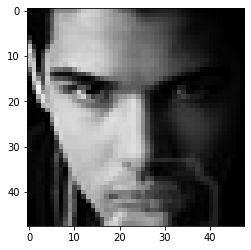

In [89]:
plt.imshow(img)
plt.show()

In [90]:
print(img.format)

None


In [91]:
img.mode

'RGB'

In [92]:
print(img.mode)
img_array = image.img_to_array(img)
img_array = tf.image.rgb_to_grayscale(img_array)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)

RGB
(48, 48, 1)


In [93]:
prediction=classifier.predict(img_array)

In [94]:
prediction

array([[3.2655775e-12, 3.7199051e-21, 8.4190658e-18, 3.0007706e-07,
        9.9999964e-01, 1.1707917e-15, 6.9137016e-16]], dtype=float32)

In [105]:
index=np.argmax(prediction)

In [106]:
label=all_class[index]
print(label)

neutral


Generic Tesing

In [97]:
Test_dir="/content/drive/MyDrive/Test//"

In [98]:
t_a_images = os.listdir(Test_dir+"angry")
t_d_images = os.listdir(Test_dir+"disgust")
t_f_images = os.listdir(Test_dir+"fear")
t_h_images = os.listdir(Test_dir+"happy")
t_n_images = os.listdir(Test_dir+"neutral")
t_sad_images = os.listdir(Test_dir+"sad")
t_sur_images = os.listdir(Test_dir+"surprise")

Actual class

   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise


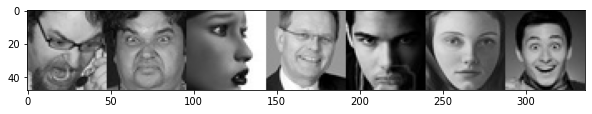

Predicted....

neutral     surprise     neutral     surprise     neutral     neutral     surprise


In [102]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    #Actual 
    angry = image.load_img(Test_dir+"angry//"+t_a_images[i],target_size=(48,48))

    disgust = image.load_img(Test_dir+"disgust//"+t_d_images[i],target_size=(48,48))

    fear = image.load_img(Test_dir+"fear//"+t_f_images[i],target_size=(48,48))

    happy = image.load_img(Test_dir+"happy//"+t_h_images[i],target_size=(48,48))

    neutral = image.load_img(Test_dir+"neutral//"+t_n_images[i],target_size=(48,48))

    sad = image.load_img(Test_dir+"sad//"+t_sad_images[i],target_size=(48,48))

    sur = image.load_img(Test_dir+"surprise//"+t_sur_images[i],target_size=(48,48))

    pair = np.concatenate((angry, disgust,fear,happy,neutral,sad,sur), axis=1)
    print("Actual class")
    print()
    print("   Angry  Vs  Disgust  Vs Fear  Vs  Happy  Vs  Neutral  Vs   Sad   Vs  Surprise")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    #Predicted
    print("Predicted....")
    print()
    angry_array = image.img_to_array(angry)
    angry_array = tf.image.rgb_to_grayscale(angry_array)
    angry_array = np.expand_dims(angry_array, axis=0)
    prediction1=classifier.predict(angry_array)
    angry_label=all_class[np.argmax(prediction1,axis=-1)[0]]

    disgust_array = image.img_to_array(disgust)
    disgust_array = tf.image.rgb_to_grayscale(disgust_array)
    disgust_array = np.expand_dims(disgust_array, axis=0)
    prediction2=classifier.predict(disgust_array)
    disgust_label=all_class[np.argmax(prediction2,axis=-1)[0]]

    fear_array = image.img_to_array(fear)
    fear_array = tf.image.rgb_to_grayscale(fear_array)
    fear_array = np.expand_dims(fear_array, axis=0)
    prediction3=classifier.predict(fear_array)
    fear_label=all_class[np.argmax(prediction3,axis=-1)[0]]

    happy_array = image.img_to_array(happy)
    happy_array = tf.image.rgb_to_grayscale(happy_array)
    happy_array = np.expand_dims(happy_array, axis=0)
    prediction4=classifier.predict(happy_array)
    happy_label=all_class[np.argmax(prediction4,axis=-1)[0]]

    neutral_array = image.img_to_array(neutral)
    neutral_array = tf.image.rgb_to_grayscale(neutral_array)
    neutral_array = np.expand_dims(neutral_array, axis=0)
    prediction5=classifier.predict(neutral_array)
    neutral_label=all_class[np.argmax(prediction5,axis=-1)[0]]

    sad_array = image.img_to_array(sad)
    sad_array = tf.image.rgb_to_grayscale(sad_array)
    sad_array = np.expand_dims(sad_array, axis=0)
    prediction6=classifier.predict(sad_array)
    sad_label=all_class[np.argmax(prediction6,axis=-1)[0]]

    sur_array = image.img_to_array(sur)
    sur_array = tf.image.rgb_to_grayscale(sur_array)
    sur_array = np.expand_dims(sur_array, axis=0)
    prediction7=classifier.predict(sur_array)
    sur_label=all_class[np.argmax(prediction7,axis=-1)[0]]

    print(angry_label,"   ",disgust_label,"   ",fear_label,"   ",happy_label,"   ",neutral_label,"   ",sad_label,"   ",sur_label)

for i in range(0,1):
    plotter(i)

# Stop Here

In [ ]:
!wget https://github.com/pydeveloperashish/Facial-Expressions-Recognition/blob/master/haarcascade_frontalface_default.xml

--2021-04-27 11:03:59--  https://github.com/pydeveloperashish/Facial-Expressions-Recognition/blob/master/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal     [ <=>                ]   8.27M  --.-KB/s    in 0.09s   

2021-04-27 11:04:02 (92.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [8673353]



In [ ]:
!pip install opencv-python

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

#face_classifier = cv2.CascadeClassifier(r'/content/haarcascade_frontalface_default.xml')
classifier =load_model(r'/content/my_model')

class_labels = ['Angry','disgust','fear','happy','neutral','sad','surprise']

cap = cv2.VideoCapture(1)
cap.isOpened()


# while True:
#     # Grab a single frame of video
#     ret, frame = cap.read()
#     labels = []
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_classifier.detectMultiScale(gray,1.3,5)

#     for (x,y,w,h) in faces:
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
#         roi_gray = gray[y:y+h,x:x+w]
#         roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
#     # rect,face,image = face_detector(frame)


#         if np.sum([roi_gray])!=0:
#             roi = roi_gray.astype('float')/255.0
#             roi = img_to_array(roi)
#             roi = np.expand_dims(roi,axis=0)

#         # make a prediction on the ROI, then lookup the class

#             preds = classifier.predict(roi)[0]
#             label=class_labels[preds.argmax()]
#             label_position = (x,y)
#             cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
#         else:
#             cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
#     cv2.imshow('Emotion Detector',frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


False